<a href="https://colab.research.google.com/github/antonisapostoloudis/1st-Assignment-Machine-Learning/blob/main/7th_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Εργασία 7-SVM-Bayes

## Ερώτημα 1

In [12]:
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


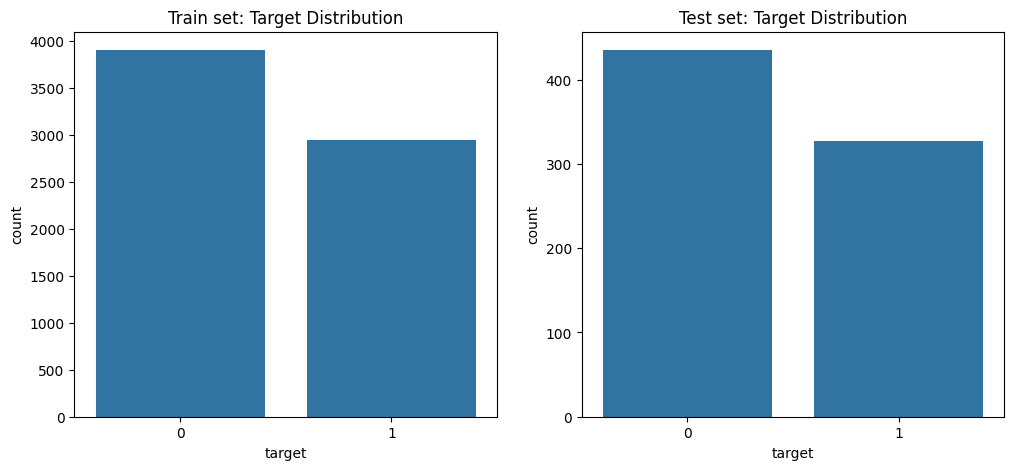

In [13]:
df = pd.read_csv("train.csv")

X = df.drop(columns=["target"])
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=0)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(data=pd.concat([X_train, y_train], axis=1), x="target", ax=axes[0])
axes[0].set_title("Train set: Target Distribution")

sns.countplot(data=pd.concat([X_test, y_test], axis=1), x="target", ax=axes[1])
axes[1].set_title("Test set: Target Distribution")

plt.show()

Το dataset όπως βλέπουμε δεν είναι τέλεια ισορροπημένο, καθώς η κλάση 0 παρουσιάζει μία υπεροχή

## Ερώτημα 2

In [14]:
X_train  = X_train.drop(columns=["id", "location"])

X_train ["keyword"] = X_train ["keyword"].fillna("null")
X_train ["text"] = X_train ["text"].fillna("null")
X_train ["inputs"] = X_train ["keyword"] + " " + X_train ["text"]

X_test  = X_test.drop(columns=["id", "location"])

X_test ["keyword"] = X_test ["keyword"].fillna("null")
X_test ["text"] = X_test ["text"].fillna("null")
X_test ["inputs"] = X_test ["keyword"] + " " + X_test ["text"]

## Ερώτημα 3

In [15]:
import re
import string

def clean_text_v2(text):
    text = text.lower()
    text = text.encode("ascii", "ignore").decode()
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"@\w+", "", text)
    text = re.sub(r"#", "", text)
    text = re.sub(r"[^a-z\s]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

X_train["inputs_clean"] = X_train["inputs"].apply(clean_text_v2)
X_test["inputs_clean"]  = X_test["inputs"].apply(clean_text_v2)



In [16]:
X_train.head()

,keyword,text,inputs,inputs_clean
6669,threat,Meek Mill responds to DrakeÛªs OVO Fest set w...,threat Meek Mill responds to DrakeÛªs OVO Fes...,threat meek mill responds to drakes ovo fest s...
3940,flood,survived the plague\nfloated the flood\njust p...,flood survived the plague\nfloated the flood\n...,flood survived the plague floated the flood ju...
7217,weapons,#Kick Hendrixonfire @'=BLACKCATS= | BIG NOOB ...,weapons #Kick Hendrixonfire @'=BLACKCATS= | B...,weapons kick hendrixonfire blackcats big noob ...
2234,deluge,Vince McMahon once again a billionaire: I reme...,deluge Vince McMahon once again a billionaire:...,deluge vince mcmahon once again a billionaire ...
4233,hazardous,Is it possible to sneak into a hospital so I c...,hazardous Is it possible to sneak into a hospi...,hazardous is it possible to sneak into a hospi...





*   Lowercasing: Μειώνει το λεξιλόγιο και αποτρέπει διπλό μετρητή λέξεων.
*   Unicode removal: Αφαιρεί emoji και ειδικά σύμβολα που δεν βοηθούν την ταξινόμηση.
*   URL removal: Οι σύνδεσμοι δεν σχετίζονται με το semantic περιεχόμενο.
*   Mention removal: Τα usernames δεν φέρουν πληροφορία για καταστροφές.
*   Hashtag symbol removal: Κρατά το keyword αλλά όχι το σύμβολο #.
*   Non-alphabetic filtering: Αφαιρεί αριθμούς και σύμβολα ως θόρυβο.
*   Whitespace normalization: Εξασφαλίζει σωστή τοκενoποίηση.











## Ερώτημα 4

In [17]:
import numpy as np

X_train_np = X_train["inputs_clean"].values
y_train_np = y_train.values

X_test_np  = X_test["inputs_clean"].values
y_test_np  = y_test.values


## Ερώτημα 5

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train_np)
X_test_tfidf = tfidf.transform(X_test_np)

## Ερώτημα 6

In [19]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

svm_clf = LinearSVC(random_state=0)
svm_clf.fit(X_train_tfidf, y_train_np)

y_train_pred = svm_clf.predict(X_train_tfidf)
y_test_pred  = svm_clf.predict(X_test_tfidf)


train_accuracy  = accuracy_score(y_train_np, y_train_pred)
train_f1        = f1_score(y_train_np, y_train_pred)
train_precision = precision_score(y_train_np, y_train_pred)
train_recall    = recall_score(y_train_np, y_train_pred)


test_accuracy  = accuracy_score(y_test_np, y_test_pred)
test_f1        = f1_score(y_test_np, y_test_pred)
test_precision = precision_score(y_test_np, y_test_pred)
test_recall    = recall_score(y_test_np, y_test_pred)

print("TRAIN SET METRICS")
print(f"Accuracy : {train_accuracy:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall   : {train_recall:.4f}")
print(f"F1-score : {train_f1:.4f}")
print("-" * 30)

# Print metrics for Test
print("TEST SET METRICS")
print(f"Accuracy : {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall   : {test_recall:.4f}")
print(f"F1-score : {test_f1:.4f}")

TRAIN SET METRICS
Accuracy : 0.9618
Precision: 0.9755
Recall   : 0.9344
F1-score : 0.9545
------------------------------
TEST SET METRICS
Accuracy : 0.7992
Precision: 0.7862
Recall   : 0.7309
F1-score : 0.7575


Η F1-score είναι η πιο σημαντική μετρική στο συγκεκριμένο πρόβλημα, γιατί το dataset δεν είναι πλήρως ισορροπημένο και η απλή ακρίβεια (accuracy) μπορεί να δώσει παραπλανητική εικόνα της απόδοσης του μοντέλου. Στην ανίχνευση πραγματικών καταστροφών από tweets, είναι κρίσιμο αφενός να εντοπίζονται όσο το δυνατόν περισσότερα πραγματικά περιστατικά (υψηλό recall), ώστε να μη χαθούν σημαντικές πληροφορίες, και αφετέρου να αποφεύγονται οι ψευδείς συναγερμοί (υψηλό precision), που θα μείωναν την αξιοπιστία του συστήματος. Η F1-score συνδυάζει αυτές τις δύο μετρικές σε έναν ενιαίο δείκτη και παρέχει μια πιο αντιπροσωπευτική αξιολόγηση της συνολικής απόδοσης του ταξινομητή.

## Ερώτημα 7

In [20]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95, random_state=0)

X_train_dense = X_train_tfidf.toarray()
X_test_dense  = X_test_tfidf.toarray()

X_train_pca = pca.fit_transform(X_train_dense)
X_test_pca  = pca.transform(X_test_dense)

linear_svc = LinearSVC(random_state=0)
linear_svc.fit(X_train_pca, y_train_np)

y_train_pred_lin = linear_svc.predict(X_train_pca)
y_test_pred_lin  = linear_svc.predict(X_test_pca)

rbf_svc = SVC(kernel="rbf", random_state=0)
rbf_svc.fit(X_train_pca, y_train_np)

y_train_pred_rbf = rbf_svc.predict(X_train_pca)
y_test_pred_rbf  = rbf_svc.predict(X_test_pca)

def compute_metrics(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1": f1_score(y_true, y_pred)
    }
print("LINEAR SVC TRAIN SET METRICS")
metrics_linear_train = compute_metrics(y_train_np, y_train_pred_lin)
print(metrics_linear_train)
print("-" * 30)
print("LINEAR SVC TEST SET METRICS")
metrics_linear_test  = compute_metrics(y_test_np, y_test_pred_lin)
print(metrics_linear_test)
print("-" * 30)
print("RBF SVC TRAIN SET METRICS")
metrics_rbf_train = compute_metrics(y_train_np, y_train_pred_rbf)
print(metrics_rbf_train)
print("-" * 30)
print("RBF SVC TEST SET METRICS")
metrics_rbf_test  = compute_metrics(y_test_np, y_test_pred_rbf)
print(metrics_rbf_test)

LINEAR SVC TRAIN SET METRICS
{'Accuracy': 0.9370894759889067, 'Precision': 0.9527927927927928, 'Recall': 0.8980978260869565, 'F1': 0.9246371743311768}
------------------------------
LINEAR SVC TEST SET METRICS
{'Accuracy': 0.8070866141732284, 'Precision': 0.7980132450331126, 'Recall': 0.7370030581039755, 'F1': 0.766295707472178}
------------------------------
RBF SVC TRAIN SET METRICS
{'Accuracy': 0.9443876806305649, 'Precision': 0.9702752293577982, 'Recall': 0.8980978260869565, 'F1': 0.9327923796083966}
------------------------------
RBF SVC TEST SET METRICS
{'Accuracy': 0.8188976377952756, 'Precision': 0.8160535117056856, 'Recall': 0.746177370030581, 'F1': 0.7795527156549521}


## Ερώτημα 8

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


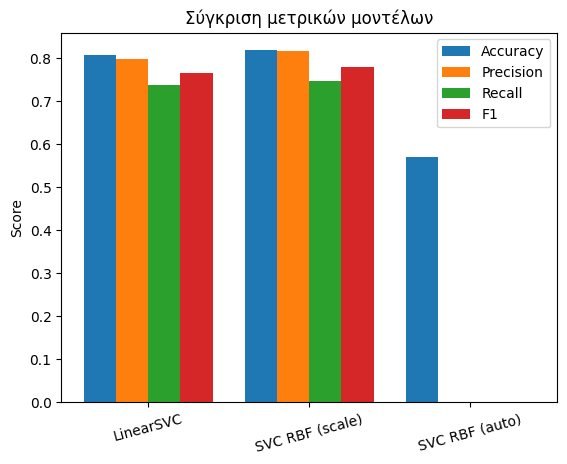

In [21]:
rbf_svc_auto = SVC(kernel="rbf", gamma="auto", random_state=0)
rbf_svc_auto.fit(X_train_pca, y_train_np)

y_train_pred_rbf_auto = rbf_svc_auto.predict(X_train_pca)
y_test_pred_rbf_auto  = rbf_svc_auto.predict(X_test_pca)

model_names = [
    "LinearSVC",
    "SVC RBF (scale)",
    "SVC RBF (auto)"
]

preds = [
    y_test_pred_lin,
    y_test_pred_rbf,
    y_test_pred_rbf_auto
]


# Υπολογισμός μετρικών
accuracy  = [accuracy_score(y_test_np, p) for p in preds]
precision = [precision_score(y_test_np, p) for p in preds]
recall    = [recall_score(y_test_np, p) for p in preds]
f1        = [f1_score(y_test_np, p) for p in preds]


# Bar-plot
x = np.arange(len(model_names))
w = 0.2

plt.figure()
plt.bar(x, accuracy,  w, label="Accuracy")
plt.bar(x + w, precision, w, label="Precision")
plt.bar(x + 2*w, recall, w, label="Recall")
plt.bar(x + 3*w, f1, w, label="F1")

plt.xticks(x + 1.5*w, model_names, rotation=15)
plt.ylabel("Score")
plt.title("Σύγκριση μετρικών μοντέλων")
plt.legend()
plt.show()

## Ερώτημα 9

In [23]:
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import TfidfVectorizer


# ---- Linear SVM ----
linear_svc = LinearSVC(random_state=0)
linear_svc.fit(X_train_tfidf, y_train)

y_train_pred_svc = linear_svc.predict(X_train_tfidf)
y_test_pred_svc  = linear_svc.predict(X_test_tfidf)

gnb = GaussianNB()
gnb.fit(X_train_dense, y_train)

y_train_pred_gnb = gnb.predict(X_train_dense)
y_test_pred_gnb  = gnb.predict(X_test_dense)

# ---- Μετρικές για Train & Test ----
print("LINEARSVC")
print(f"TRAIN -> Acc:{accuracy_score(y_train, y_train_pred_svc):.4f} | Prec:{precision_score(y_train, y_train_pred_svc):.4f} | Rec:{recall_score(y_train, y_train_pred_svc):.4f} | F1:{f1_score(y_train, y_train_pred_svc):.4f}")
print(f"TEST  -> Acc:{accuracy_score(y_test, y_test_pred_svc):.4f} | Prec:{precision_score(y_test, y_test_pred_svc):.4f} | Rec:{recall_score(y_test, y_test_pred_svc):.4f} | F1:{f1_score(y_test, y_test_pred_svc):.4f}")
print("\nGAUSSIAN NB")
print(f"TRAIN -> Acc:{accuracy_score(y_train, y_train_pred_gnb):.4f} | Prec:{precision_score(y_train, y_train_pred_gnb):.4f} | Rec:{recall_score(y_train, y_train_pred_gnb):.4f} | F1:{f1_score(y_train, y_train_pred_gnb):.4f}")
print(f"TEST  -> Acc:{accuracy_score(y_test, y_test_pred_gnb):.4f} | Prec:{precision_score(y_test, y_test_pred_gnb):.4f} | Rec:{recall_score(y_test, y_test_pred_gnb):.4f} | F1:{f1_score(y_test, y_test_pred_gnb):.4f}")


LINEARSVC
TRAIN -> Acc:0.9618 | Prec:0.9755 | Rec:0.9344 | F1:0.9545
TEST  -> Acc:0.7992 | Prec:0.7862 | Rec:0.7309 | F1:0.7575

GAUSSIAN NB
TRAIN -> Acc:0.8775 | Prec:0.7782 | Rec:1.0000 | F1:0.8753
TEST  -> Acc:0.6207 | Prec:0.5391 | Rec:0.8012 | F1:0.6445
